In [1]:
import torch
import matplotlib.pyplot as plt
from elfragmentador.nn_encoding import ConcatenationEncoder
from elfragmentador.model import PepTransformerModel

CHECKPOINT = 'https://github.com/jspaezp/elfragmentador-modelzoo/raw/main/0.50.0b14/0.50.0b14_onecycle_10e_64_120_val_l%3D0.141270_epoch%3D009.ckpt'

try:
    model = PepTransformerModel.load_from_checkpoint(CHECKPOINT)
except RuntimeError as e:
    print(e)
    saved_ckpt = torch.load(CHECKPOINT)
    state_dict = saved_ckpt['state_dict']
    state_dict.pop("decoder.peak_decoder.layers.1.weight")
    state_dict.pop("decoder.peak_decoder.layers.1.bias")
    model = PepTransformerModel(**saved_ckpt['hyper_parameters'])
    model.load_state_dict(state_dict=state_dict, strict=False)
    print(model)

model.eval()


PepTransformerModel(
  (encoder): _PeptideTransformerEncoder(
    (aa_encoder): AASequenceEmbedding(
      (position_embed): PositionalEncoding()
      (aa_encoder): Embedding(24, 64, padding_idx=0)
      (mod_encoder): Embedding(15, 64, padding_idx=0)
    )
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
          )
          (linear1): Linear(in_features=64, out_features=120, bias=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (linear2): Linear(in_features=120, out_features=64, bias=True)
          (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.0, inplace=False)
          (dropout2): Dropout(p=0.0, inplace=False)
        )
        (1): Trans

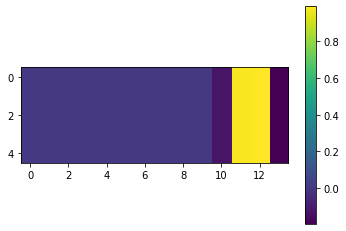

In [2]:
x1 = torch.zeros((5, 1, 10))
x2 = torch.cat([x1, x1+1], axis = 1)
encoder = model.decoder.nce_encoder
output = encoder(x1, torch.tensor([[25]]))

plt.imshow(output[:,0,:])
plt.colorbar()

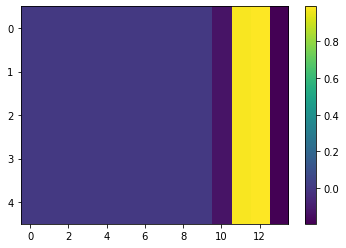

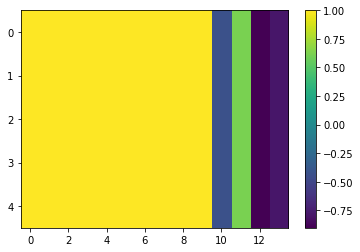

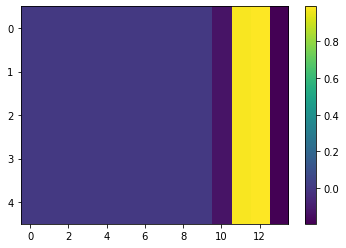

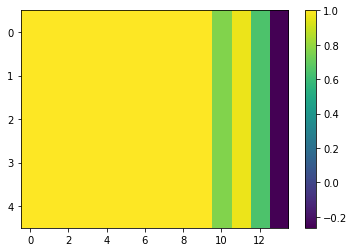

In [3]:
output = encoder(x2, torch.tensor([[25], [35]]))
plt.imshow(output[:,0,:], aspect="auto")
plt.colorbar()
plt.show()
plt.imshow(output[:,1,:], aspect="auto")
plt.colorbar()
plt.show()

output = encoder(x2, torch.tensor([[25], [26]]))
plt.imshow(output[:,0,:], aspect="auto")
plt.colorbar()
plt.show()
plt.imshow(output[:,1,:], aspect="auto")
plt.colorbar()
plt.show()

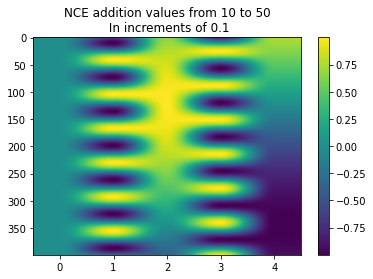

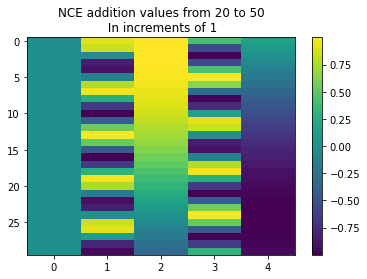

In [13]:
x1 = torch.zeros((1, 400, 1))
in_vals = torch.tensor([[(x/10)+10] for x in range(400)])
output = encoder(x1, in_vals)

plt.imshow(output[0,:,:], aspect = "auto")
plt.colorbar()
plt.title("NCE addition values from 10 to 50\n In increments of 0.1")
plt.show()

x1 = torch.zeros((1, 30, 1))
in_vals = torch.tensor([[x] for x in range(20, 50)])
output = encoder(x1, in_vals)

plt.imshow(output[0,:,:], aspect = "auto")
plt.colorbar()
plt.title("NCE addition values from 20 to 50\n In increments of 1")
plt.show()

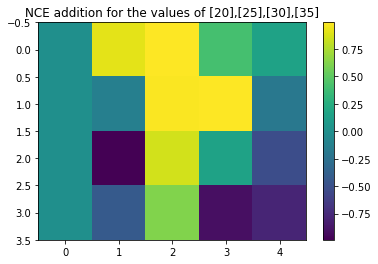

In [14]:
x1 = torch.zeros((1, 4, 1))
in_vals = torch.tensor([[20],[25],[30],[35]])
output = encoder(x1, in_vals)

plt.imshow(output[0,:,:], aspect = "auto")
plt.colorbar()
plt.title("NCE addition for the values of [20],[25],[30],[35]")
plt.show()

PositionalEncoding()


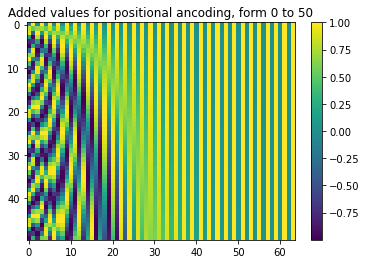

In [16]:
posencoder = model.encoder.aa_encoder.position_embed
print(posencoder)
x = torch.zeros((50, 64)).float()
output = posencoder(x)

plt.imshow(output[:,0,:], aspect = "auto")
plt.colorbar()
plt.title("Added values for positional ancoding, form 0 to 50")
plt.show()

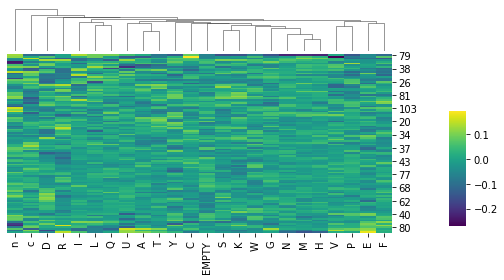

In [64]:
import elfragmentador.constants as EFC
import pandas as pd
import seaborn as sns

df, mod_df = model.encoder.aa_encoder.as_DataFrames()

df
g = sns.clustermap(df, cmap="viridis", dendrogram_ratio=(0.02, 0.2), figsize=(8,4))
g.ax_row_dendrogram.set_visible(False)
g.fig.subplots_adjust(right=0.7)
g.ax_cbar.set_position((0.8, .2, .03, .4))



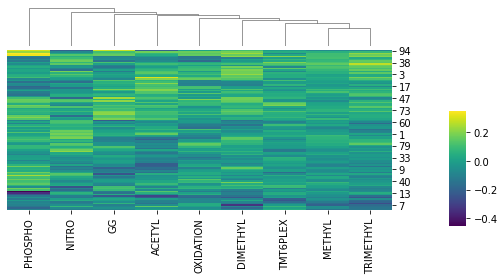

In [68]:

df = pd.DataFrame(data = model.encoder.aa_encoder.mod_encoder.weight.detach().numpy().T)
df.columns = ['EMPTY'] + list(EFC.MODIFICATION)

for x in df:
    if sum(df[x]**2) < 0.01:
        del df[x]

g = sns.clustermap(df, cmap="viridis", dendrogram_ratio=(0.02, 0.2), figsize=(8,4))
g.ax_row_dendrogram.set_visible(False)
g.fig.subplots_adjust(right=0.7)
g.ax_cbar.set_position((0.8, .2, .03, .4))

/home/jspaezp/.cache/pypoetry/virtualenvs/elfragmentador-wPpFMDm--py3.9/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


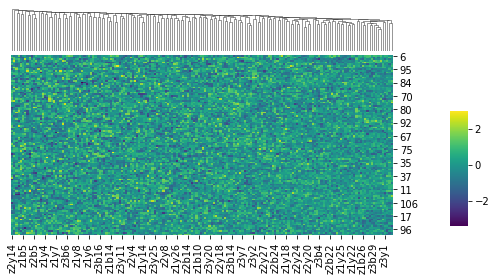

In [70]:
df = pd.DataFrame(data = model.decoder.trans_decoder_embedding.weight.detach().numpy().T)
df.columns = list(EFC.FRAG_EMBEDING_LABELS)

for x in df:
    if sum(df[x]**2) < 0.01:
        del df[x]

g = sns.clustermap(df, cmap="viridis", dendrogram_ratio=(0.02, 0.2), figsize=(8,4))
g.ax_row_dendrogram.set_visible(False)
g.fig.subplots_adjust(right=0.7)
g.ax_cbar.set_position((0.8, .2, .03, .4))